In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
input_dim = X_train.shape[1] * X_train.shape[2]  # 28*28
output_dim = num_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [16]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden layers and one output layer. All of the hidden layers should be dense. The first layer and the second layer should have neuron sizes of 32 and 16, respectively. Train this model for 20 epochs, and compare your training and test set performance with the example in the checkpoint. Is there any difference? If so, why?

In [36]:
def build_model(optimizer,model_name='Model',output_activation='softmax',metrics='accuracy',loss='categorical_crossentropy',
                batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(32, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(16 ,activation='relu'))
  # fifth layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history


def model_results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model results
  results = model.evaluate(X_test, y_test, verbose=0)
  print(f'{model_name} Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Accuracy: '.capitalize() , round(results[1],6))

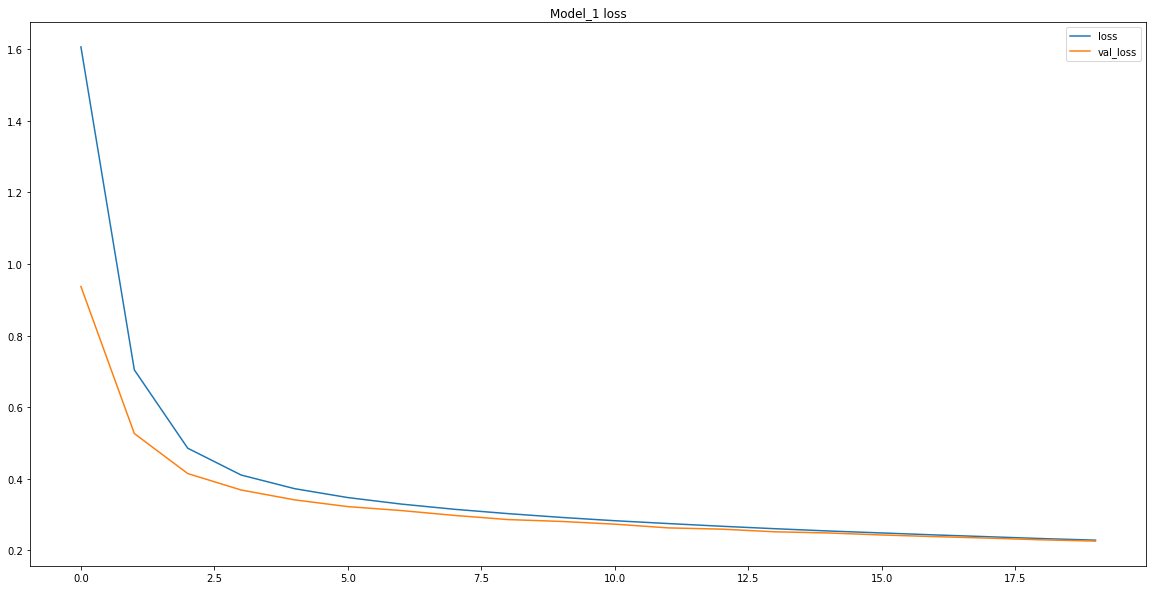

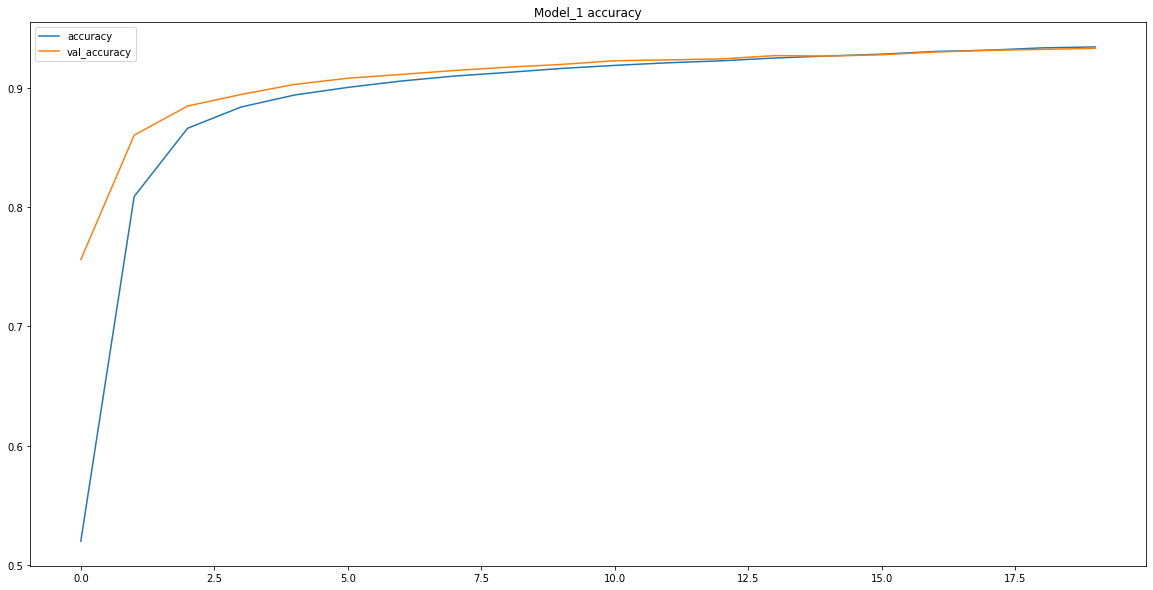

Model_1 loss:  0.225596
Model_1 accuracy:  0.9332


In [39]:
# build model
model_1, model_1_history = build_model(optimizer=SGD,batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
model_1_results = model_results(model_1, model_1_history, model_name='Model_1')

The test accuracy is slightly worse (93.32%) than the module's test accuracy of 97%. This is due to the fact we have much fewer nuerons in this model. We are missing some complexity in the data by having a model that takes in less input. So our simpler model performs worse. 

## In this task, build another ANN. This ANN should have five hidden layers and one output layer. All of the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128, and 64. Train this model for 20 epochs, and test it using the same data from the previous task. Then compare your results. Is there any difference? If so, why?

In [42]:
def build_6_layer_model(optimizer,model_name='Model',output_activation='softmax',metrics='accuracy',loss='categorical_crossentropy',
                batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(1024, input_dim=X_train.shape[1] ,activation='relu'))
  # second layer
  model.add(Dense(513 ,activation='relu'))
  # third layer
  model.add(Dense(256 ,activation='relu'))
  # fourth layer
  model.add(Dense(128 ,activation='relu'))
  # fitth layer
  model.add(Dense(64 ,activation='relu'))
  # sixth layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

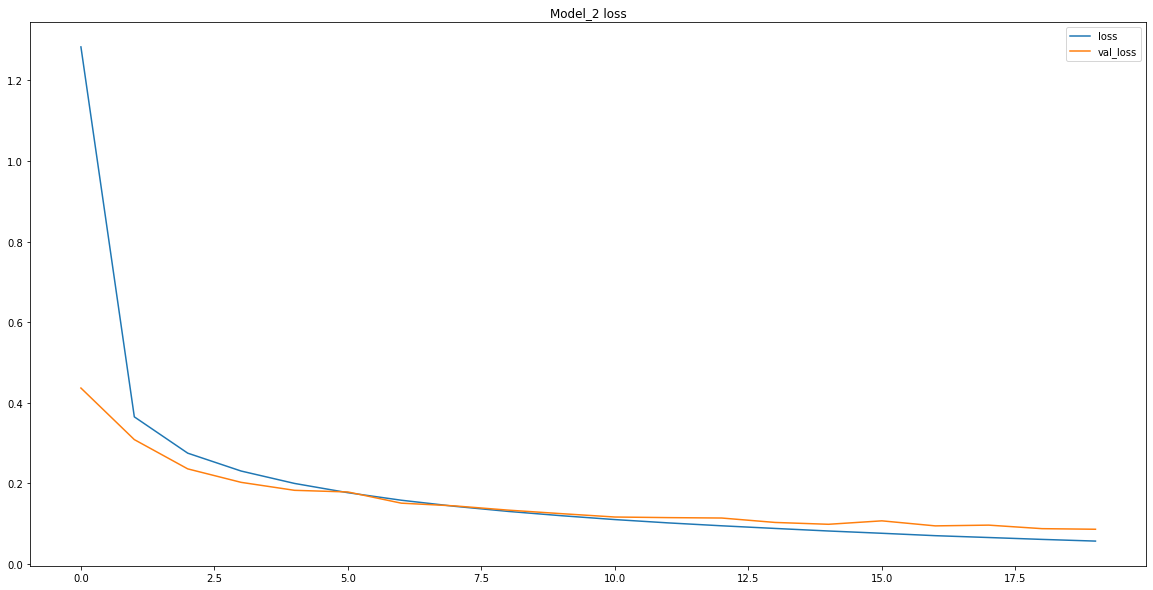

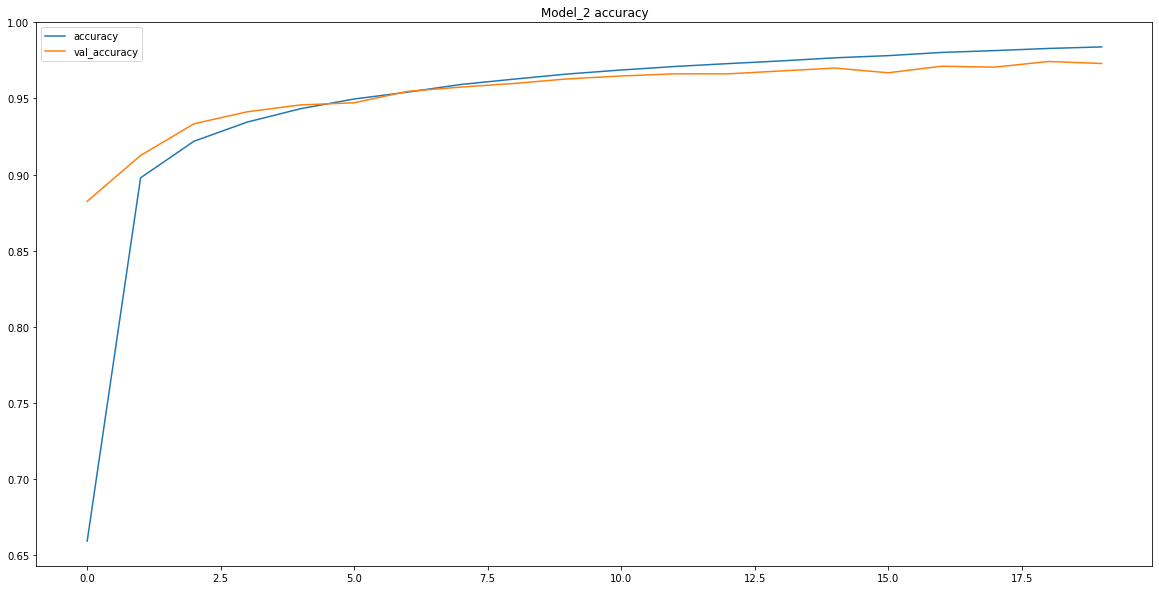

Model_2 loss:  0.086415
Model_2 accuracy:  0.9729


In [44]:
model_2, model_2_history = build_6_layer_model(optimizer=SGD,batch_size=batch_size,epochs=nb_epoch)

# model results and visuals
model_2_results = model_results(model_2, model_2_history, model_name='Model_2')

We see much better test results with a more complex model that has more nuerons. The more complex model has a test accuracy of 97.29% compared to the simpler model's test accuracy of 93.32%. But there is a trade off with runtime. The more complex model took much longer to run. 